In [1]:
import numpy as np
import pandas as pd
import sys, os, time
main_folder = './../'
if main_folder not in sys.path:
    sys.path.append(main_folder)
from evolution import DifferentialEvolution
from glob       import glob
from tqdm       import tqdm

import dirs
from utils      import get_solution, ProgressBar, write_log
import matplotlib.pyplot as plt 

progbar = ProgressBar(elapsed_time=True)

### Parameters

In [2]:
# Competition Parameters
funcId      = 1
dim         = 10
numRuns     = 2
targetError = 1e-8

# Algorithm Parameters
pop_size = 300
percMaxEvals = 1
maxEvals = 'auto'
maxGenerations = None
fitness_clusters = None
crossover = 'binonial'
mutation = 'best'
n_diff = 1
lambda_mutation = .5
opposition = False
input_data_filepath = './../input_data'
active = False

In [3]:
# Parameters
algorithm = "de"
mutation = "best"
n_diff = 1
crossover = "bin"
funcId = 9
dim = 10
numRuns = 51
pop_size = 300
percMaxEvals = 0.7
lambda_mutation = 0.5
opposition = False
fitness_clusters = None
input_data_filepath = "./input_data"
active = True


In [4]:
maxEvals = maxEvals if percMaxEvals is None else percMaxEvals*10000*dim
run_tag = '[' + '_'.join([str(funcId), 
                          str(dim), 
                          str(numRuns),
                          str(pop_size), 
                          str(percMaxEvals),                                                     
                          '{}'.format(lambda_mutation), 
                          str(opposition),
                          str(fitness_clusters)
                         ])  + ']'
run_tag

'[9_10_51_300_0.7_0.5_False_None]'

In [5]:
alg = DifferentialEvolution(dim=dim, func_id=funcId, pop_size=pop_size, crossover=crossover, 
        opposition=opposition, mutation=mutation, lambda_mutation=.5, fitness_clusters=fitness_clusters)

output_filepath = os.path.join(dirs.results, str(alg))
if not os.path.exists(output_filepath):
    os.makedirs(output_filepath)
output_filepath = output_filepath + '/' + run_tag

print ('Writing log at ', output_filepath + 'log.tsv')
write_log(filepath=output_filepath + 'log.tsv', 
          mode="w+", 
          text='[{}]\trun\telapsedTime\tsuccessRate\n'.format(time.strftime("%Y-%m-%d %H:%M:%S", time.gmtime())))  

Writing log at 

./results/DE/best/1/bin/[9_10_51_300_0.7_0.5_False_None]log.tsv

In [6]:
hist = pd.DataFrame()
arr_runs = range(numRuns)
solution = get_solution(funcId, dim, input_data_filepath=input_data_filepath)
successRate = 0
for idx_run in arr_runs:
    progbar.update_progress(idx_run/float(len(arr_runs)))
    
    # Differential Evolution
    alg = DifferentialEvolution(dim=dim, func_id=funcId, pop_size=pop_size, crossover=crossover, 
        opposition=opposition, mutation=mutation, lambda_mutation=.5, fitness_clusters=fitness_clusters)
    
    errorHist, fitnessHist = alg.optimize(target=solution, max_f_evals=maxEvals, target_error=targetError, verbose=True)        
    bestError = errorHist.iloc[-1,:].min()
    errorHist["run"] = np.ones(errorHist.shape[0], dtype=int)*idx_run
    hist = pd.concat([hist, errorHist], ignore_index=False)    
    if bestError <= targetError:
        print ("Target error achieved with error {}".format(bestError))
        successRate += 1
    
    write_log(filepath=output_filepath + 'log.tsv', 
              text='[{}]\t{}/{}\t{}\t{}\n'.format(time.strftime("%Y-%m-%d %H:%M:%S", time.gmtime()), 
                                              idx_run+1,
                                              len(arr_runs),
                                              progbar.get_elapsed_time(),
                                              successRate)
             )
    
hist.index.name = 'generation'
hist.to_csv(output_filepath + 'hist.tsv', sep='\t')
progbar.update_progress(1)

[0:00:00][----------] 0.00% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	961.4558

Best Fitness:	926.7781
Solution:	900.0000
Diff:		26.7781

[0:08:57][----------] 1.96% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	963.1684

Best Fitness:	937.6277
Solution:	900.0000
Diff:		37.6277

[0:17:17][----------] 3.92% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	961.3781

Best Fitness:	932.0189
Solution:	900.0000
Diff:		32.0189

[0:25:49][#---------] 5.88% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	961.6116

Best Fitness:	931.8436
Solution:	900.0000
Diff:		31.8436

[0:34:27][#---------] 7.84% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	961.4623

Best Fitness:	932.5043
Solution:	900.0000
Diff:		32.5043

[0:42:17][#---------] 9.80% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	965.4149

Best Fitness:	933.1370
Solution:	900.0000
Diff:		33.1370

[0:49:13][#---------] 11.76% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	958.4762

Best Fitness:	932.1824
Solution:	900.0000
Diff:		32.1824

[0:56:38][#---------] 13.73% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	971.7834

Best Fitness:	939.4312
Solution:	900.0000
Diff:		39.4312

[1:03:31][##--------] 15.69% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	962.9234

Best Fitness:	927.4204
Solution:	900.0000
Diff:		27.4204

[1:10:45][##--------] 17.65% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	967.0466

Best Fitness:	936.0421
Solution:	900.0000
Diff:		36.0421

[1:17:45][##--------] 19.61% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	962.0943

Best Fitness:	930.1710
Solution:	900.0000
Diff:		30.1710

[1:24:56][##--------] 21.57% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	963.5897

Best Fitness:	935.5947
Solution:	900.0000
Diff:		35.5947

[1:32:17][##--------] 23.53% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	960.4592

Best Fitness:	926.9577
Solution:	900.0000
Diff:		26.9577

[1:38:26][###-------] 25.49% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	962.7096

Best Fitness:	934.0412
Solution:	900.0000
Diff:		34.0412

[1:44:31][###-------] 27.45% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	955.8559

Best Fitness:	928.6112
Solution:	900.0000
Diff:		28.6112

[1:50:42][###-------] 29.41% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	960.9268

Best Fitness:	927.4882
Solution:	900.0000
Diff:		27.4882

[1:56:59][###-------] 31.37% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	962.1134

Best Fitness:	938.4598
Solution:	900.0000
Diff:		38.4598

[2:03:18][###-------] 33.33% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	958.8491

Best Fitness:	932.5849
Solution:	900.0000
Diff:		32.5849

[2:09:21][####------] 35.29% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	961.4153

Best Fitness:	930.5633
Solution:	900.0000
Diff:		30.5633

[2:15:24][####------] 37.25% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	957.4298

Best Fitness:	924.4538
Solution:	900.0000
Diff:		24.4538

[2:21:36][####------] 39.22% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	962.8627

Best Fitness:	936.8825
Solution:	900.0000
Diff:		36.8825

[2:26:56][####------] 41.18% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	956.7651

Best Fitness:	923.3886
Solution:	900.0000
Diff:		23.3886

[2:32:10][####------] 43.14% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	962.8443

Best Fitness:	936.4524
Solution:	900.0000
Diff:		36.4524

[2:37:23][#####-----] 45.10% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	962.1372

Best Fitness:	936.2090
Solution:	900.0000
Diff:		36.2090

[2:42:44][#####-----] 47.06% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	962.7575

Best Fitness:	933.6444
Solution:	900.0000
Diff:		33.6444

[2:48:06][#####-----] 49.02% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	963.4102

Best Fitness:	935.3595
Solution:	900.0000
Diff:		35.3595

[2:53:22][#####-----] 50.98% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	960.8395

Best Fitness:	935.2169
Solution:	900.0000
Diff:		35.2169

[2:58:45][#####-----] 52.94% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	963.5381

Best Fitness:	922.9373
Solution:	900.0000
Diff:		22.9373

[3:03:55][#####-----] 54.90% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	968.3842

Best Fitness:	941.6148
Solution:	900.0000
Diff:		41.6148

[3:08:34][######----] 56.86% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	964.6831

Best Fitness:	936.4094
Solution:	900.0000
Diff:		36.4094

[3:13:08][######----] 58.82% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	960.1422

Best Fitness:	927.9456
Solution:	900.0000
Diff:		27.9456

[3:17:38][######----] 60.78% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	969.3849

Best Fitness:	938.5725
Solution:	900.0000
Diff:		38.5725

[3:22:13][######----] 62.75% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	958.4607

Best Fitness:	927.9186
Solution:	900.0000
Diff:		27.9186

[3:26:50][######----] 64.71% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	963.1483

Best Fitness:	929.3251
Solution:	900.0000
Diff:		29.3251

[3:31:21][#######---] 66.67% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	963.5115

Best Fitness:	935.6920
Solution:	900.0000
Diff:		35.6920

[3:35:55][#######---] 68.63% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	968.7255

Best Fitness:	941.5186
Solution:	900.0000
Diff:		41.5186

[3:40:12][#######---] 70.59% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	964.6536

Best Fitness:	932.1983
Solution:	900.0000
Diff:		32.1983

[3:44:03][#######---] 72.55% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	956.2159

Best Fitness:	923.2444
Solution:	900.0000
Diff:		23.2444

[3:47:54][#######---] 74.51% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	961.5580

Best Fitness:	936.9322
Solution:	900.0000
Diff:		36.9322

[3:51:40][########--] 76.47% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	960.1337

Best Fitness:	932.4083
Solution:	900.0000
Diff:		32.4083

[3:55:28][########--] 78.43% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	957.8492

Best Fitness:	924.6843
Solution:	900.0000
Diff:		24.6843

[3:59:17][########--] 80.39% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	961.8716

Best Fitness:	937.5313
Solution:	900.0000
Diff:		37.5313

[4:03:02][########--] 82.35% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	961.1401

Best Fitness:	933.1636
Solution:	900.0000
Diff:		33.1636

[4:06:48][########--] 84.31% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	956.4354

Best Fitness:	922.3675
Solution:	900.0000
Diff:		22.3675

[4:10:08][#########-] 86.27% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	959.9287

Best Fitness:	927.9744
Solution:	900.0000
Diff:		27.9744

[4:13:13][#########-] 88.24% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	963.3156

Best Fitness:	933.6306
Solution:	900.0000
Diff:		33.6306

[4:16:17][#########-] 90.20% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	960.0438

Best Fitness:	924.8688
Solution:	900.0000
Diff:		24.8688

[4:19:20][#########-] 92.16% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	963.6755

Best Fitness:	929.3108
Solution:	900.0000
Diff:		29.3108

[4:22:21][#########-] 94.12% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	958.8179

Best Fitness:	927.5658
Solution:	900.0000
Diff:		27.5658

[4:25:22][##########] 96.08% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	962.7906

Best Fitness:	928.0285
Solution:	900.0000
Diff:		28.0285

[4:28:24][##########] 98.04% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	963.7669

Best Fitness:	938.5416
Solution:	900.0000
Diff:		38.5416

[4:31:34][##########] 100.00% Done...


In [7]:
print ("Elapsed Time: ", progbar.get_elapsed_time())

Elapsed Time: 

4:31:34

In [8]:
errorHist.tail()

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,run
generation,,,,,,,,,,,,,,,,,,,,,
226,83.988855,74.873528,61.965805,62.399292,67.648834,65.849936,69.781277,60.805233,72.989613,64.495317,...,73.91095,77.258138,62.751039,63.132672,58.152866,55.08558,59.084999,74.677827,78.686053,50
227,83.988855,74.873528,61.965805,62.399292,67.648834,65.849936,69.781277,60.805233,70.754951,64.495317,...,73.91095,77.258138,62.751039,63.132672,58.152866,55.08558,59.084999,74.677827,78.686053,50
228,83.988855,74.873528,61.965805,62.399292,67.648834,65.849936,69.781277,60.805233,70.754951,64.495317,...,73.91095,77.258138,62.751039,63.132672,58.152866,55.08558,59.084999,74.677827,78.686053,50
229,83.988855,74.873528,61.965805,62.399292,67.648834,65.849936,69.781277,60.805233,70.754951,64.495317,...,73.91095,77.258138,62.751039,63.132672,58.152866,55.08558,59.084999,74.677827,78.686053,50
230,83.988855,64.206332,61.965805,62.399292,67.648834,65.849936,69.781277,60.805233,70.754951,64.495317,...,73.91095,77.258138,62.751039,63.132672,58.152866,55.08558,59.084999,74.677827,78.686053,50


In [9]:
arr_error = list()
arr_best_error = list()
for run in hist['run'].unique():
    df_run = hist[hist['run'] == run].drop(['run'], axis=1) 
    bestError = df_run.iloc[-1,:].min()    
    arr_best_error.append(bestError)    
    print ('Best error for run {}: {}'.format(run, bestError))
    arr_error.append(np.array(df_run.min(axis=1)))    
arr_error = np.array(arr_error)
# arr_error

Best error for run 0: 26.778148113519933

Best error for run 1: 37.627679105326706

Best error for run 2: 32.01889285061918

Best error for run 3: 31.843614700890953

Best error for run 4: 32.50433185743759

Best error for run 5: 33.136953694731005

Best error for run 6: 32.182411098232706

Best error for run 7: 39.431226044185564

Best error for run 8: 27.42038998867838

Best error for run 9: 36.04206142557871

Best error for run 10: 30.171018299270713

Best error for run 11: 35.59474580823803

Best error for run 12: 26.95766955231511

Best error for run 13: 34.041189083729705

Best error for run 14: 28.61119337958803

Best error for run 15: 27.48817294631749

Best error for run 16: 38.459814452234696

Best error for run 17: 32.58492391033269

Best error for run 18: 30.563276273557676

Best error for run 19: 24.453830148904103

Best error for run 20: 36.88247430228978

Best error for run 21: 23.388579434358917

Best error for run 22: 36.452392590403406

Best error for run 23: 36.20897846546029

Best error for run 24: 33.64438944971812

Best error for run 25: 35.359521577564465

Best error for run 26: 35.21691750767377

Best error for run 27: 22.937293710380004

Best error for run 28: 41.61479929068969

Best error for run 29: 36.40938984836032

Best error for run 30: 27.945602515429186

Best error for run 31: 38.57252756768298

Best error for run 32: 27.918615297882525

Best error for run 33: 29.325054658603904

Best error for run 34: 35.69199455196542

Best error for run 35: 41.518556090020525

Best error for run 36: 32.19834207151564

Best error for run 37: 23.24437827158772

Best error for run 38: 36.93219960374256

Best error for run 39: 32.40833110430253

Best error for run 40: 24.68431633170576

Best error for run 41: 37.53133746150661

Best error for run 42: 33.16364490420051

Best error for run 43: 22.367514844582615

Best error for run 44: 27.974449645375444

Best error for run 45: 33.63060406041893

Best error for run 46: 24.86883384803923

Best error for run 47: 29.310824966450355

Best error for run 48: 27.56580385578286

Best error for run 49: 28.028544167267114

Best error for run 50: 38.54159780003454

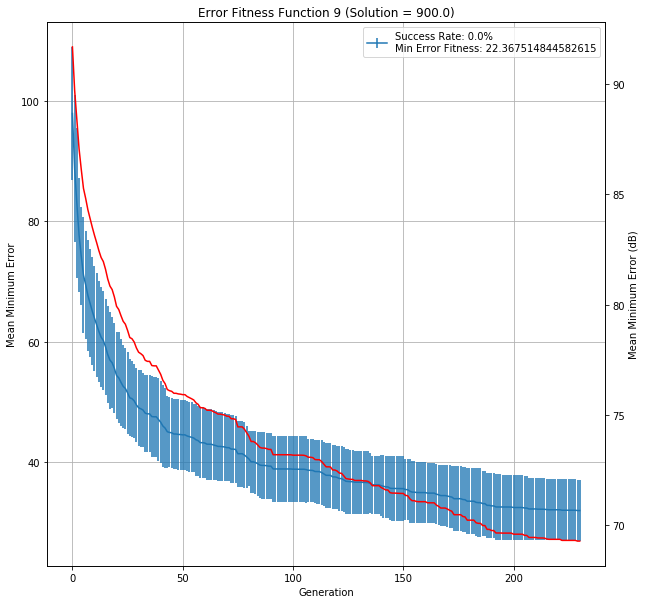

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
label = 'Success Rate: {}%\nMin Error Fitness: {}'.format(100*(successRate/float(numRuns)), arr_error.min())
ax.errorbar(np.arange(alg.generations), arr_error.mean(axis=0), yerr=arr_error.std(axis=0), label=label)
ax2 = ax.twinx()
ax2.plot(np.arange(alg.generations), 20*np.log(arr_error.mean(axis=0)), label='Mean Min Error (dB)', color='red')
ax2.set_ylabel('Mean Minimum Error (dB)')

ax.grid(True)
ax.set_ylabel('Mean Minimum Error')
ax.legend()
ax.set_xlabel('Generation')
ax.set_title('Error Fitness Function {} (Solution = {})'.format(funcId, solution))
plt.savefig(output_filepath + 'mean_error_evolution.jpeg', bbox_inches = 'tight')

In [11]:
df_sumup = pd.DataFrame(columns=['algorithm', '#Fc', 'D', 'percFES'] + ['run_' + str(i) for i in np.arange(1,numRuns+1,1)] + ['mean', 'elapsed_time', 'evals'])
df_sumup.loc[df_sumup.shape[0]] = [str(alg), funcId, dim, percMaxEvals] + arr_best_error + [np.mean(arr_best_error), progbar.get_elapsed_time(), alg.fitnessEvals]
print ('Saving df_sumup to ', output_filepath + 'df_sumup.tsv')
df_sumup.to_csv(output_filepath + 'df_sumup.tsv', sep='\t')
df_sumup

Saving df_sumup to 

./results/DE/best/1/bin/[9_10_51_300_0.7_0.5_False_None]df_sumup.tsv

,algorithm,#Fc,D,percFES,run_1,run_2,run_3,run_4,run_5,run_6,...,run_45,run_46,run_47,run_48,run_49,run_50,run_51,mean,elapsed_time,evals
0,DE/best/1/bin,9,10,0.7,26.778148,37.627679,32.018893,31.843615,32.504332,33.136954,...,27.97445,33.630604,24.868834,29.310825,27.565804,28.028544,38.541598,31.949987,4:31:34,69900
